In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import shutil

def return_dataframe(filename):
    return pd.read_csv(filename).set_index("id")

def copy_dataframe(input_file, output_file):
    if not os.path.exists(output_file):
        shutil.copyfile(input_file, output_file)

WT_folder = f"D:/mouse_data/new_data/df_output/any_lag/WT"
GCaMP_folder = f"D:/mouse_data/new_data/df_output/any_lag/GCaMP"
combined_folder = f"D:/mouse_data/new_data/df_output/any_lag/combined"

files = ["nvc", "funcsim", "funcrep", "modularity"]
file_id = f"v1_mvmt"

Make a copy of the WT files for the combined dataframe.

In [3]:
for file in files:

    WT_df_filename = os.path.join(WT_folder, file+"_WT_"+file_id+".csv")
    GCaMP_df_filename = os.path.join(GCaMP_folder, file+"_GCaMP_"+file_id+".csv")
    destination_df_filename = os.path.join(combined_folder, file+"_combined_"+file_id+".csv")

    WT_df = return_dataframe(WT_df_filename)
    GCaMP_df = return_dataframe(GCaMP_df_filename)

    combined_df = pd.concat((WT_df, GCaMP_df), axis=0)

    combined_df.to_csv(destination_df_filename)

    # print(combined_df)

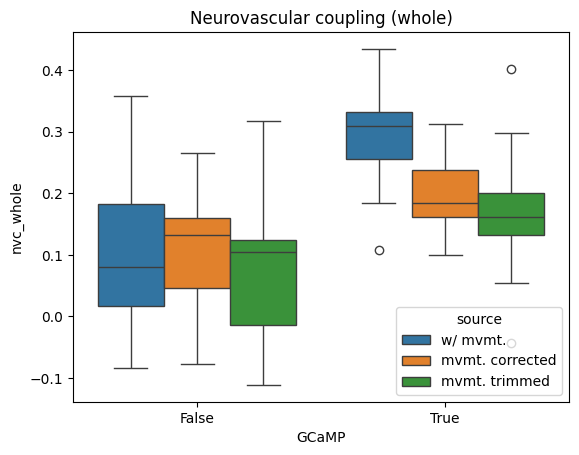

mwu for mvmt: 0.00028
mwu for mvmt corrected: 0.01444
mwu for mvmt trimmed: 0.00686
ind. t-test for mvmt: 0.00000
ind. t-test for mvmt corrected: 0.00349
ind. t-test for mvmt trimmed: 0.00950


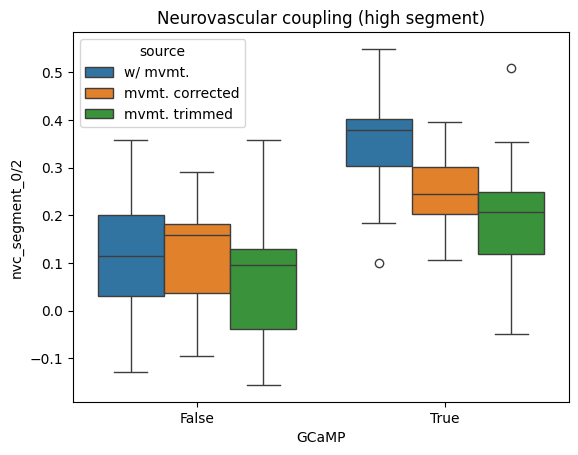

mwu for mvmt: 0.00009
mwu for mvmt corrected: 0.01003
mwu for mvmt trimmed: 0.00755


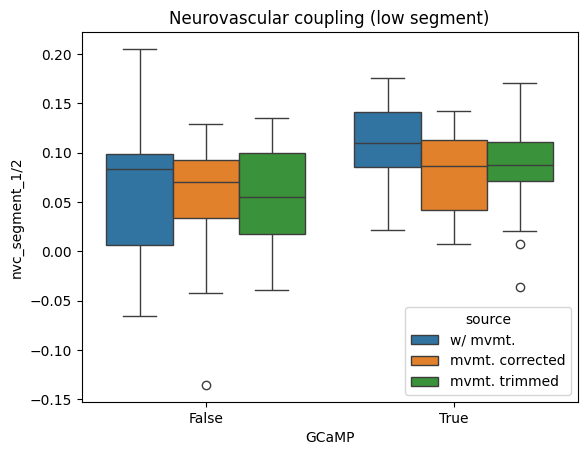

mwu for mvmt: 0.03364
mwu for mvmt corrected: 0.33424
mwu for mvmt trimmed: 0.07668


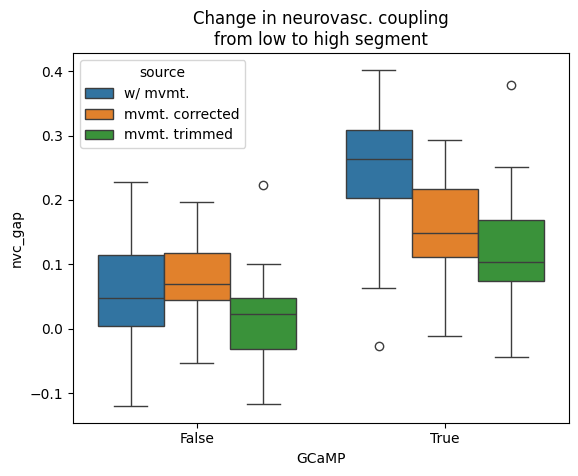

mwu for mvmt: 0.00010
mwu for mvmt corrected: 0.00306
mwu for mvmt trimmed: 0.01003


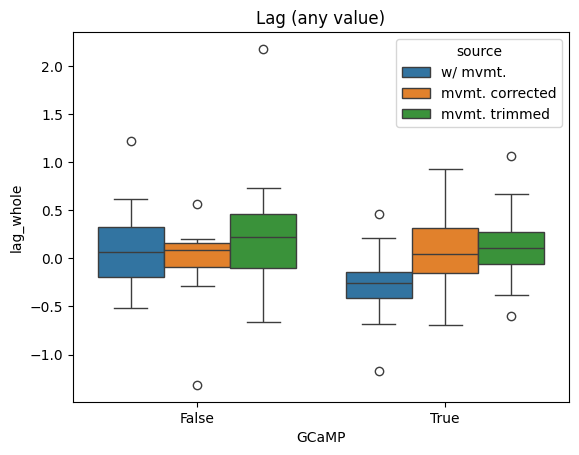

mwu for mvmt: 0.01879
mwu for mvmt corrected: 0.82174
mwu for mvmt trimmed: 0.62923


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind

def mwu_test(df, data_str):

    WT_array = np.array(df[df["GCaMP"] == False][data_str])
    GCaMP_array = np.array(df[df["GCaMP"] == True][data_str])

    return mannwhitneyu(GCaMP_array, WT_array)

def print_mwu_values(df_list, id_list, data_str):

    for i, df in enumerate(df_list):
        print(f"mwu for {id_list[i]}: {mwu_test(df, data_str).pvalue:.5f}")

def print_ttest_values(df_list, id_list, data_str):
    
    for i, df in enumerate(df_list):
        WT_array = np.array(df[df["GCaMP"] == False][data_str])
        GCaMP_array = np.array(df[df["GCaMP"] == True][data_str])
        print(f"ind. t-test for {id_list[i]}: {ttest_ind(GCaMP_array, WT_array).pvalue:.5f}")



mvmt_df = return_dataframe(os.path.join(combined_folder, f"nvc_combined_v1_mvmt.csv"))
no_mvmt_df = return_dataframe(os.path.join(combined_folder, f"nvc_combined_v1_no_mvmt.csv"))
trim_mvmt_df = return_dataframe(os.path.join(combined_folder, f"nvc_combined_v1_trim_mvmt.csv"))

mvmt_df["source"] = "w/ mvmt."
no_mvmt_df["source"] = "mvmt. corrected"
trim_mvmt_df["source"] = "mvmt. trimmed"

df_all = pd.concat([mvmt_df, no_mvmt_df, trim_mvmt_df])

df_all["nvc_gap"] = df_all["nvc_segment_0/2"] - df_all["nvc_segment_1/2"]

sns.boxplot(df_all, x="GCaMP", y="nvc_whole", hue="source")
plt.title(f"Neurovascular coupling (whole)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "nvc_whole")
print_ttest_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "nvc_whole")

sns.boxplot(df_all, x="GCaMP", y="nvc_segment_0/2", hue="source")
plt.title(f"Neurovascular coupling (high segment)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "nvc_segment_0/2")

sns.boxplot(df_all, x="GCaMP", y="nvc_segment_1/2", hue="source")
plt.title(f"Neurovascular coupling (low segment)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "nvc_segment_1/2")

sns.boxplot(df_all, x="GCaMP", y="nvc_gap", hue="source")
plt.title(f"Change in neurovasc. coupling\nfrom low to high segment")
plt.show()
mvmt_df["nvc_gap"] = mvmt_df["nvc_segment_0/2"] - mvmt_df["nvc_segment_1/2"]
no_mvmt_df["nvc_gap"] = no_mvmt_df["nvc_segment_0/2"] - no_mvmt_df["nvc_segment_1/2"]
trim_mvmt_df["nvc_gap"] = trim_mvmt_df["nvc_segment_0/2"] - trim_mvmt_df["nvc_segment_1/2"]
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "nvc_gap")

sns.boxplot(df_all, x="GCaMP", y="lag_whole", hue="source")
plt.title(f"Lag (any value)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "lag_whole")

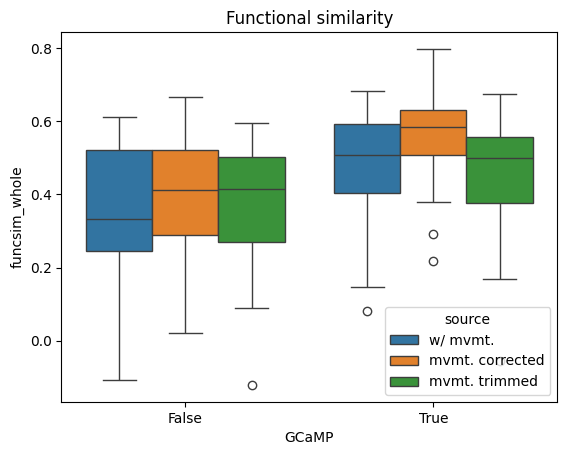

mwu for mvmt: 0.05346
mwu for mvmt corrected: 0.01444
mwu for mvmt trimmed: 0.19793


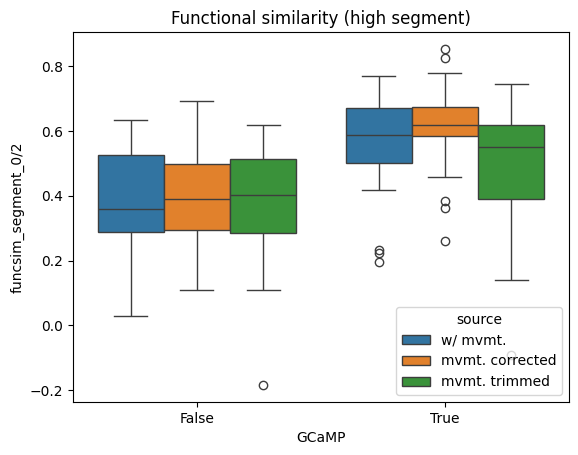

mwu for mvmt: 0.01003
mwu for mvmt corrected: 0.00377
mwu for mvmt trimmed: 0.05346


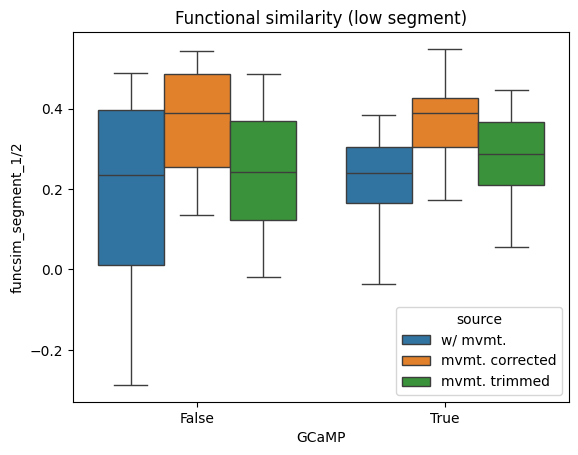

mwu for mvmt: 0.84686
mwu for mvmt corrected: 0.87214
mwu for mvmt trimmed: 0.60656


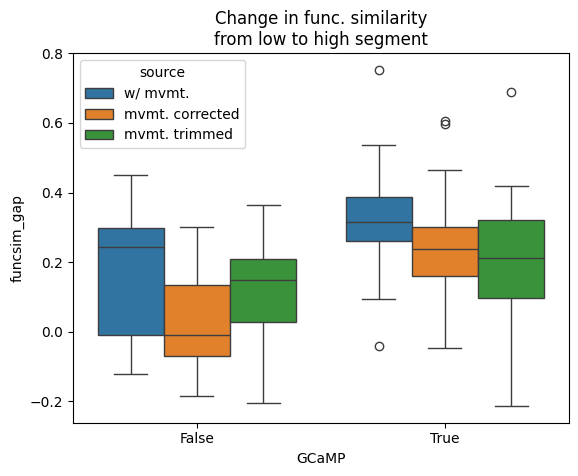

mwu for mvmt: 0.03940
mwu for mvmt corrected: 0.00161
mwu for mvmt trimmed: 0.13871


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

mvmt_df = return_dataframe(os.path.join(combined_folder, f"funcsim_combined_v1_mvmt.csv"))
no_mvmt_df = return_dataframe(os.path.join(combined_folder, f"funcsim_combined_v1_no_mvmt.csv"))
trim_mvmt_df = return_dataframe(os.path.join(combined_folder, f"funcsim_combined_v1_trim_mvmt.csv"))

mvmt_df["source"] = "w/ mvmt."
no_mvmt_df["source"] = "mvmt. corrected"
trim_mvmt_df["source"] = "mvmt. trimmed"

df_all = pd.concat([mvmt_df, no_mvmt_df, trim_mvmt_df])

df_all["funcsim_gap"] = df_all["funcsim_segment_0/2"] - df_all["funcsim_segment_1/2"]

sns.boxplot(df_all, x="GCaMP", y="funcsim_whole", hue="source")
plt.title(f"Functional similarity")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "funcsim_whole")

sns.boxplot(df_all, x="GCaMP", y="funcsim_segment_0/2", hue="source")
plt.title(f"Functional similarity (high segment)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "funcsim_segment_0/2")

sns.boxplot(df_all, x="GCaMP", y="funcsim_segment_1/2", hue="source")
plt.title(f"Functional similarity (low segment)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "funcsim_segment_1/2")

sns.boxplot(df_all, x="GCaMP", y="funcsim_gap", hue="source")
plt.title(f"Change in func. similarity\nfrom low to high segment")
plt.show()

mvmt_df["funcsim_gap"] = mvmt_df["funcsim_segment_0/2"] - mvmt_df["funcsim_segment_1/2"]
no_mvmt_df["funcsim_gap"] = no_mvmt_df["funcsim_segment_0/2"] - no_mvmt_df["funcsim_segment_1/2"]
trim_mvmt_df["funcsim_gap"] = trim_mvmt_df["funcsim_segment_0/2"] - trim_mvmt_df["funcsim_segment_1/2"]
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "funcsim_gap")

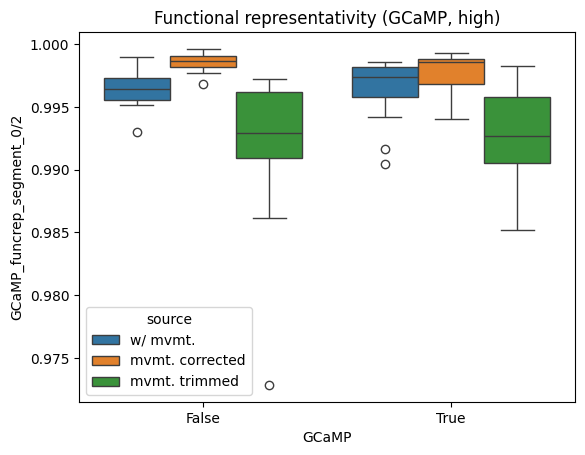

mwu for mvmt: 0.43983
mwu for mvmt corrected: 0.19793
mwu for mvmt trimmed: 0.74755


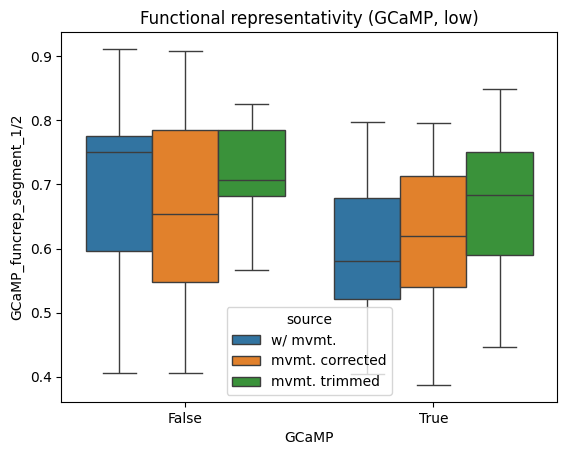

mwu for mvmt: 0.04960
mwu for mvmt corrected: 0.45912
mwu for mvmt trimmed: 0.22129


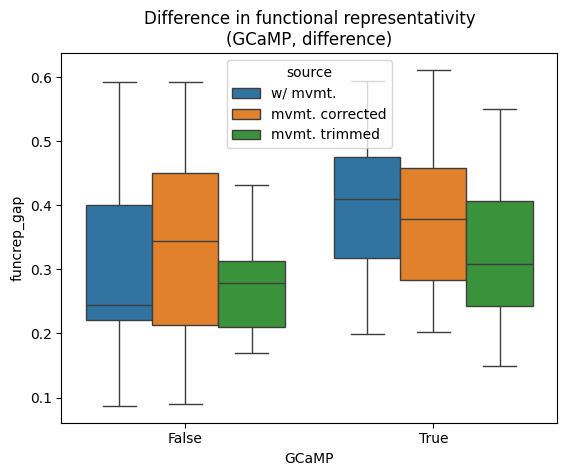

mwu for mvmt: 0.04598
mwu for mvmt corrected: 0.43983
mwu for mvmt trimmed: 0.23369


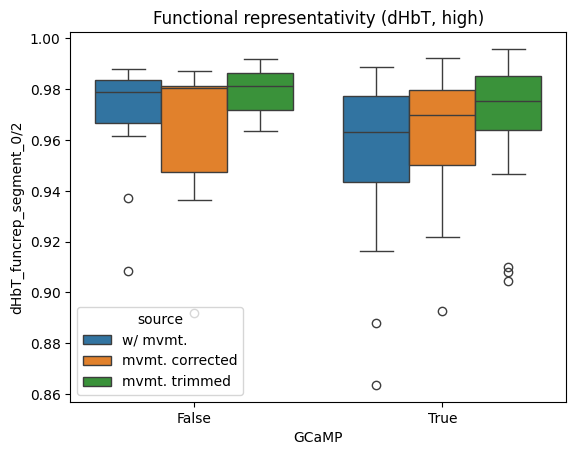

mwu for mvmt: 0.14750
mwu for mvmt corrected: 0.62923
mwu for mvmt trimmed: 0.40267


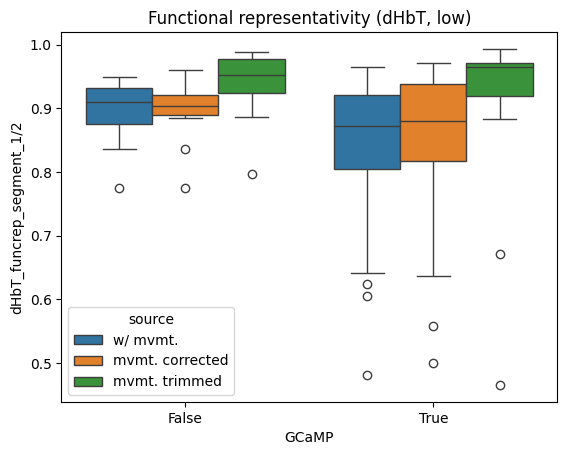

mwu for mvmt: 0.04960
mwu for mvmt corrected: 0.45912
mwu for mvmt trimmed: 0.22129


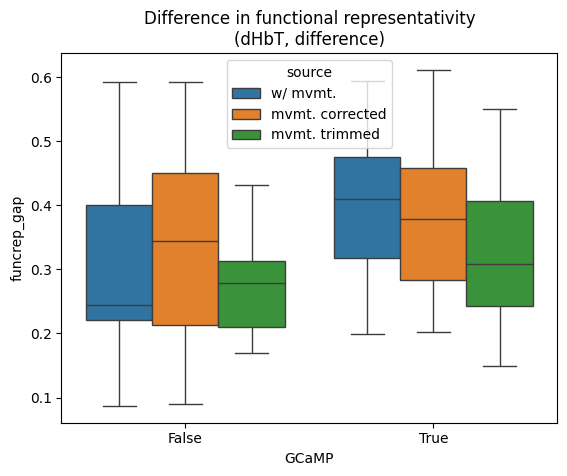

mwu for mvmt: 0.47887
mwu for mvmt corrected: 0.40267
mwu for mvmt trimmed: 0.82174


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

mvmt_df = return_dataframe(os.path.join(combined_folder, f"funcrep_combined_v1_mvmt.csv"))
no_mvmt_df = return_dataframe(os.path.join(combined_folder, f"funcrep_combined_v1_no_mvmt.csv"))
trim_mvmt_df = return_dataframe(os.path.join(combined_folder, f"funcrep_combined_v1_trim_mvmt.csv"))

mvmt_df["source"] = "w/ mvmt."
no_mvmt_df["source"] = "mvmt. corrected"
trim_mvmt_df["source"] = "mvmt. trimmed"

df_all = pd.concat([mvmt_df, no_mvmt_df, trim_mvmt_df])

df_all["funcrep_gap"] = df_all["GCaMP_funcrep_segment_0/2"] - df_all["GCaMP_funcrep_segment_1/2"]

sns.boxplot(df_all, x="GCaMP", y="GCaMP_funcrep_segment_0/2", hue="source")
plt.title(f"Functional representativity (GCaMP, high)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "GCaMP_funcrep_segment_0/2")

sns.boxplot(df_all, x="GCaMP", y="GCaMP_funcrep_segment_1/2", hue="source")
plt.title(f"Functional representativity (GCaMP, low)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "GCaMP_funcrep_segment_1/2")

sns.boxplot(df_all, x="GCaMP", y="funcrep_gap", hue="source")
plt.title(f"Difference in functional representativity\n(GCaMP, difference)")
plt.show()
mvmt_df["GCaMP_funcrep_gap"] = mvmt_df["GCaMP_funcrep_segment_0/2"] - mvmt_df["GCaMP_funcrep_segment_1/2"]
no_mvmt_df["GCaMP_funcrep_gap"] = no_mvmt_df["GCaMP_funcrep_segment_0/2"] - no_mvmt_df["GCaMP_funcrep_segment_1/2"]
trim_mvmt_df["GCaMP_funcrep_gap"] = trim_mvmt_df["GCaMP_funcrep_segment_0/2"] - trim_mvmt_df["GCaMP_funcrep_segment_1/2"]
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "GCaMP_funcrep_gap")

sns.boxplot(df_all, x="GCaMP", y="dHbT_funcrep_segment_0/2", hue="source")
plt.title(f"Functional representativity (dHbT, high)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "dHbT_funcrep_segment_0/2")

sns.boxplot(df_all, x="GCaMP", y="dHbT_funcrep_segment_1/2", hue="source")
plt.title(f"Functional representativity (dHbT, low)")
plt.show()
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "GCaMP_funcrep_segment_1/2")

sns.boxplot(df_all, x="GCaMP", y="funcrep_gap", hue="source")
plt.title(f"Difference in functional representativity\n(dHbT, difference)")
plt.show()
mvmt_df["dHbT_funcrep_gap"] = mvmt_df["dHbT_funcrep_segment_0/2"] - mvmt_df["dHbT_funcrep_segment_1/2"]
no_mvmt_df["dHbT_funcrep_gap"] = no_mvmt_df["dHbT_funcrep_segment_0/2"] - no_mvmt_df["dHbT_funcrep_segment_1/2"]
trim_mvmt_df["dHbT_funcrep_gap"] = trim_mvmt_df["dHbT_funcrep_segment_0/2"] - trim_mvmt_df["dHbT_funcrep_segment_1/2"]
print_mwu_values([mvmt_df, no_mvmt_df, trim_mvmt_df], ["mvmt", "mvmt corrected", "mvmt trimmed"], "dHbT_funcrep_gap")

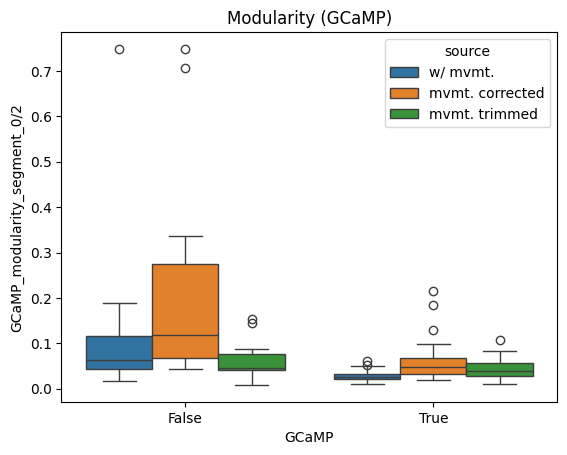

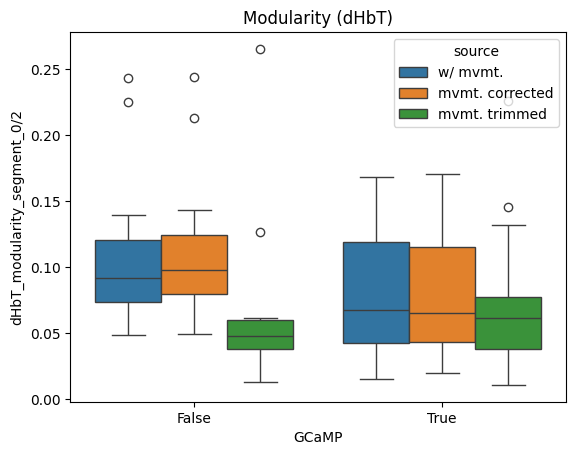

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

mvmt_df = return_dataframe(os.path.join(combined_folder, f"modularity_combined_v1_mvmt.csv"))
no_mvmt_df = return_dataframe(os.path.join(combined_folder, f"modularity_combined_v1_no_mvmt.csv"))
trim_mvmt_df = return_dataframe(os.path.join(combined_folder, f"modularity_combined_v1_trim_mvmt.csv"))

mvmt_df["source"] = "w/ mvmt."
no_mvmt_df["source"] = "mvmt. corrected"
trim_mvmt_df["source"] = "mvmt. trimmed"

df_all = pd.concat([mvmt_df, no_mvmt_df, trim_mvmt_df])

sns.boxplot(df_all, x="GCaMP", y="GCaMP_modularity_segment_0/2", hue="source")
plt.title(f"Modularity (GCaMP)")
plt.show()

sns.boxplot(df_all, x="GCaMP", y="dHbT_modularity_segment_0/2", hue="source")
plt.title(f"Modularity (dHbT)")
plt.show()

# Preview FC

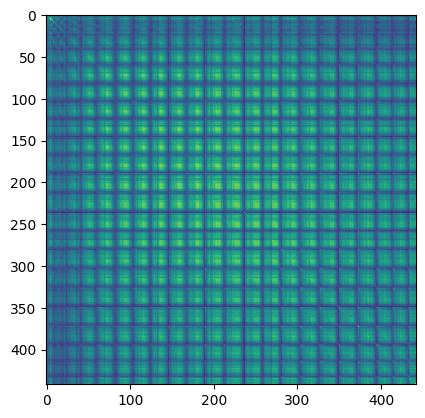

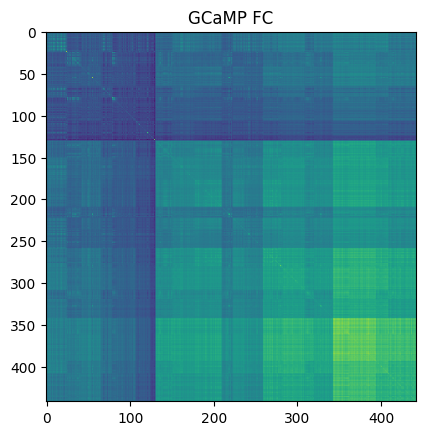

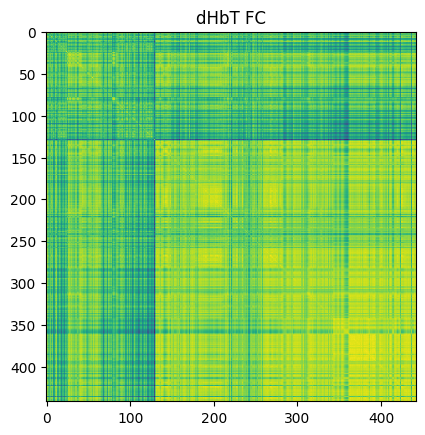

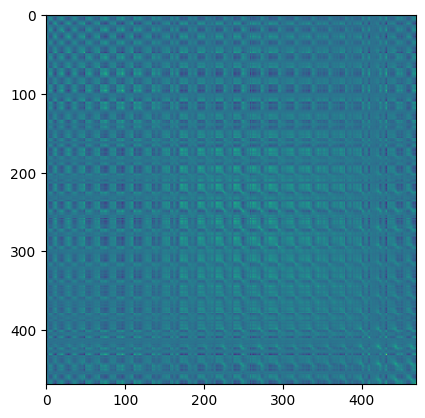

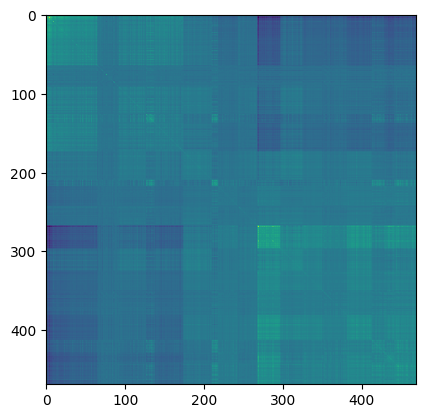

In [33]:
from toolbox_jocha.hdf5 import get_data_from_dataset
from numba import njit
from toolbox_jocha.ets import split_into_bins, format_array
import matplotlib.pyplot as plt

def compute_dfc_flat(signals):
    T, N = signals.shape
    # print(f"{T}, {N}")
    triu_len = (N * (N + 1)) // 2  # Number of upper triangle elements (including diagonal)
    dFC_flat = np.zeros((T, triu_len))

    for t in range(T):
        idx = 0
        for i in range(N):
            for j in range(i, N):
                dFC_flat[t, idx] = signals[t, i] * signals[t, j]
                idx += 1

    return dFC_flat

def return_dfc_filename(mouse_num, id, signal_str):
    return f"D:/mouse_data/new_data/M{mouse_num}/formatted/M{mouse_num}_{id}_{signal_str}_dfc.h5"

def load_dfc(mouse_num, id, signal_str):
    dfc, _ = get_data_from_dataset(return_dfc_filename(mouse_num, id, signal_str), "dfc")
    return dfc

def compute_fc(dfc, indices=None):
    if indices is not None:
        dfc = dfc[indices,:]

    fc = np.nanmean(dfc, axis=0)

    return fc

def flat_to_symmetric(flat, N):
    """Convert a flattened upper triangle vector to a full symmetric matrix."""
    mat = np.zeros((N, N))
    inds = np.triu_indices(N)
    mat[inds] = flat
    mat[(inds[1], inds[0])] = flat  # Reflect upper triangle to lower
    return mat

def to_square_fc(fc):

    N = int((np.sqrt(8*fc.shape[0]+1)-1)/2)
    sym_FC = flat_to_symmetric(fc, N)

    return sym_FC

# ==========================================================================
#
# ==========================================================================

mouse_num = "316-8"
id = "v1_mvmt"
signal_str = "GCaMP"

dfc = load_dfc(mouse_num, id, signal_str)

fc = compute_fc(dfc)

square_fc = to_square_fc(fc)

plt.imshow(square_fc, cmap="viridis")
plt.show()

from toolbox_jocha.community_detection import hierarchical_clustering, reorder_communities, plot_reordered_and_communities

linkage_mat, clusters = hierarchical_clustering(square_fc, show=False)

reordered_fc = reorder_communities(square_fc, clusters)

dhbt_dfc = load_dfc(mouse_num, id, "dHbT")
dhbt_fc = compute_fc(dhbt_dfc)
dhbt_square_fc = to_square_fc(dhbt_fc)

reordered_dhbt_fc = reorder_communities(dhbt_square_fc, clusters)

plt.imshow(reordered_fc)
plt.title("GCaMP FC")
plt.show()

plt.imshow(reordered_dhbt_fc)
plt.title("dHbT FC")
plt.show()


# WILDTYPE

mouse_num = "39-12"
id = "v1_mvmt"
signal_str = "GCaMP"

dfc = load_dfc(mouse_num, id, signal_str)

fc = compute_fc(dfc)

square_fc = to_square_fc(fc)

plt.imshow(square_fc, cmap="viridis")
plt.show()

from toolbox_jocha.community_detection import hierarchical_clustering, reorder_communities, plot_reordered_and_communities

linkage_mat, clusters = hierarchical_clustering(square_fc, show=False)

reordered_fc = reorder_communities(square_fc, clusters)

plt.imshow(reordered_fc)
plt.show()

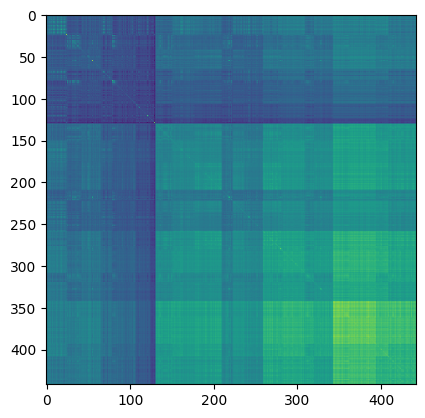